In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plot import * # Some functions used for plotting

In [2]:
# import functions from wce

import sys
sys.path.append("../bnv_running") # Give the path to wce.py

from bnv_running import evolve

Evolution of Wilson Coefficients for different cases

In [3]:
E_END = 700e12
initial_wc = [0.1]*9

def gamma_matrix_fn(t, yu, yd, g1, g2, g3, NJKL_val): # function to compute the gamma matrix at given t=ln(E)   
    sum_g1_sq = np.sum(g1**2)
    sum_g2_sq = np.sum(g2**2)
    sum_g3_sq = np.sum(g3**2)

    sum_yu_sq = np.sum(yu**2)
    sum_yd_sq = np.sum(yd**2)

    sum_yu_yd = np.sum(yu*yd)

    c1 = 3*(sum_yu_sq + 2*sum_yd_sq)/2

    # Diagonal elements {The (4 pi)^2 are factored out}
    gamma11 = -sum_g1_sq
    gamma22 = (-sum_g1_sq + 9*sum_g2_sq + 8*sum_g3_sq + c1 )
    gamma33 = ( sum_g1_sq / 2 + 9*sum_g2_sq/2 + 8*sum_g3_sq + c1 )
    gamma44 = (-4*sum_g1_sq + c1)
    gamma55 = (2*sum_g1_sq + c1)
    gamma66 = ( 2*sum_g1_sq + 8*sum_g3_sq + c1 )
    gamma77 = (-sum_g1_sq + 9*sum_g2_sq + c1)
    gamma88 = ( sum_g1_sq / 2 + 9*sum_g2_sq/2 + c1)
    gamma99 = (-4*sum_g1_sq + 8*sum_g3_sq + c1)

    # Off-diagonal elements
    gamma17 = gamma32 = gamma87 = 6 * sum_yu_yd
    gamma23 = gamma58 = gamma78 = 12 * sum_yu_yd
    gamma48 = gamma63 = gamma93 = 18 * sum_yu_yd
    gamma39 = gamma84 = 3 * sum_yu_yd

    Gamma = [
        [gamma11, 0, 0, 0, 0, 0, gamma17, 0, 0],
        [0, gamma22, gamma23, 0, 0, 0, 0, 0, 0],
        [0, gamma32, gamma33, 0, 0, 0, 0, 0, gamma39],
        [0, 0, 0, gamma44, 0, 0, 0, gamma48, 0],
        [0, 0, 0, 0, gamma55, 0, 0, gamma58, 0],
        [0, 0, gamma63, 0, 0, gamma66, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, gamma77, gamma78, 0],
        [0, 0, 0, gamma84, 0, 0, gamma87, gamma88, 0],
        [0, 0, gamma93, 0, 0, 0, 0, 0, gamma99],
    ]

    return Gamma

<center><strong>Case 1 (SM)</strong></center>

In [4]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0]

initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ]
]



In [5]:
t_solutions_1, y_solutions_1 = evolve(E_transitions, NJKL_val, initial_couplings, initial_wc, E_END, gamma_matrix_fn)[:2]

energy_solutions_1 = np.exp(t_solutions_1) * 1e-12  # Energy in TeV
wilson_coefficients_1 = [y_sol['wc'] for y_sol in y_solutions_1]

In [6]:
g1_1 = [y_sol['g1'] for y_sol in y_solutions_1]
g2_1 = [y_sol['g2'] for y_sol in y_solutions_1]
g3_1 = [y_sol['g3'] for y_sol in y_solutions_1]


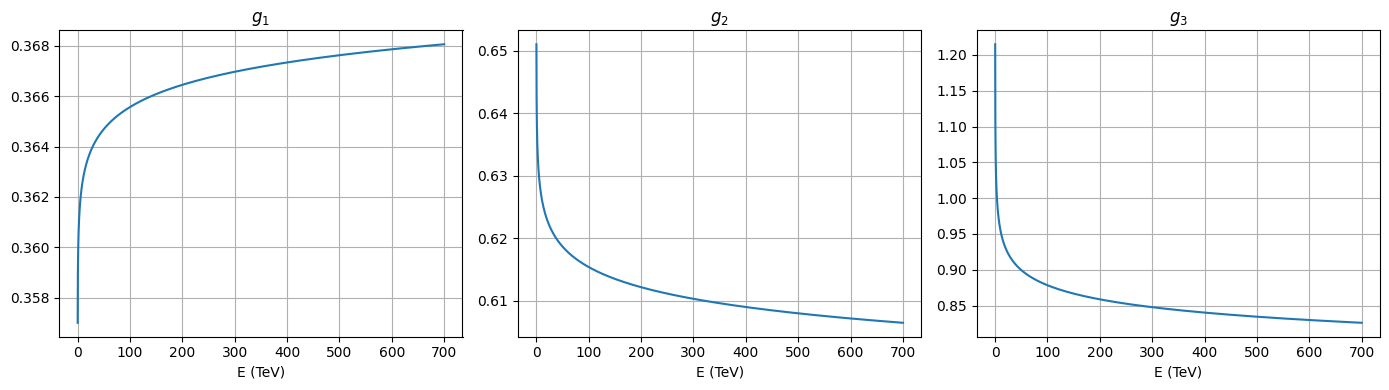

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
axs[0].plot(energy_solutions_1[0], g1_1[0][0])
axs[0].set_title("$g_1$")
axs[0].set_xlabel("E (TeV)")
axs[0].grid(True)

axs[1].plot(energy_solutions_1[0], g2_1[0][0])
axs[1].set_title("$g_2$")
axs[1].set_xlabel("E (TeV)")
axs[1].grid(True)

axs[2].plot(energy_solutions_1[0], g3_1[0][0])
axs[2].set_title("$g_3$")
axs[2].set_xlabel("E (TeV)")
axs[2].grid(True)

plt.tight_layout()
plt.show()

<center><strong>Case 2
</strong></center>

In [8]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0, 0]

n = int((E_END - 10e12) // 10e12)
print(n)
for i in range(n):
    E_transitions.append(10e12 + i * 10e12)
    N = 0
    J = i+1
    K = 0
    L = 0
    NJKL_val.append([N, J, K, L])
    X_val.append(i+1)




69


In [9]:
initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ],
]

for i in range(n):
    g1_coupling = [None]*(i+1)
    g1_coupling.append(0.5)
    initial_couplings.append(
        [
            [None],
            [None],

            g1_coupling,
            [None],
            [None],
        ]
    )

print(initial_couplings[:5])

[[[1.238e-05], [2.69e-05], [0.357], [0.651], [1.215]], [[None], [None], [None, 0.5], [None], [None]], [[None], [None], [None, None, 0.5], [None], [None]], [[None], [None], [None, None, None, 0.5], [None], [None]], [[None], [None], [None, None, None, None, 0.5], [None], [None]]]


In [10]:
t_solutions_2, y_solutions_2 = evolve(E_transitions, NJKL_val, initial_couplings, initial_wc, E_END, gamma_matrix_fn)[:2]
energy_solutions_2 = np.exp(t_solutions_2) * 1e-12  # Energy in TeV
wilson_coefficients_2 = [y_sol['wc'] for y_sol in y_solutions_2]

<center><strong>Case 3</strong></center>

In [11]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0, 0]

n = int((E_END - 10e12) // 10e12)
print(n)
for i in range(n):
    E_transitions.append(10e12 + i * 10e12)
    N = i+1
    J = 0
    K = 0
    L = 0
    NJKL_val.append([N, J, K, L])
    X_val.append(i+1)




69


In [12]:
initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ],
]

for i in range(n):
    N_coupling = [None]*(i+1)
    N_coupling.append(0.1)
    initial_couplings.append(
        [
            N_coupling,
            N_coupling,

            [None],
            [None],
            [None],
        ]
    )

print(initial_couplings[:5])

[[[1.238e-05], [2.69e-05], [0.357], [0.651], [1.215]], [[None, 0.1], [None, 0.1], [None], [None], [None]], [[None, None, 0.1], [None, None, 0.1], [None], [None], [None]], [[None, None, None, 0.1], [None, None, None, 0.1], [None], [None], [None]], [[None, None, None, None, 0.1], [None, None, None, None, 0.1], [None], [None], [None]]]


In [13]:
t_solutions_3, y_solutions_3 = evolve(E_transitions, NJKL_val, initial_couplings, initial_wc, E_END, gamma_matrix_fn)[:2]

energy_solutions_3 = [np.exp(arr) * 1e-12 for arr in t_solutions_3]  # Energy in TeV
wilson_coefficients_3 = [y_sol['wc'] for y_sol in y_solutions_3]

<center><strong>Case 4</strong></center>

In [14]:
E_transitions = [91.19e9]

NJKL_val = [
    [0, 0, 0, 0],
]

X_val = [0, 0]

n = int((E_END - 10e12) // 10e12)
print(n)
for i in range(n):
    E_transitions.append(10e12 + i * 10e12)
    N = i+1
    J = i+1
    K = 0
    L = 0
    NJKL_val.append([N, J, K, L])
    X_val.append(i+1)




69


In [15]:
initial_couplings = [
    [
        [12.38e-6],
        [26.9e-6],
        
        [0.357],
        [0.651],
        [1.215],
    ],
]

for i in range(n):
    N_coupling = [None]*(i+1)
    N_coupling.append(0.1)
    g1_coupling = [None]*(i+1)
    g1_coupling.append(0.5)
    initial_couplings.append(
        [
            N_coupling,
            N_coupling,

            g1_coupling,
            [None],
            [None],
        ]
    )

print(initial_couplings[:5])

[[[1.238e-05], [2.69e-05], [0.357], [0.651], [1.215]], [[None, 0.1], [None, 0.1], [None, 0.5], [None], [None]], [[None, None, 0.1], [None, None, 0.1], [None, None, 0.5], [None], [None]], [[None, None, None, 0.1], [None, None, None, 0.1], [None, None, None, 0.5], [None], [None]], [[None, None, None, None, 0.1], [None, None, None, None, 0.1], [None, None, None, None, 0.5], [None], [None]]]


In [16]:
t_solutions_4, y_solutions_4 = evolve(E_transitions, NJKL_val, initial_couplings, initial_wc, E_END, gamma_matrix_fn)[:2]

energy_solutions_4 = [np.exp(arr) * 1e-12 for arr in t_solutions_4]  # Energy in TeV
wilson_coefficients_4 = [y_sol['wc'] for y_sol in y_solutions_4]

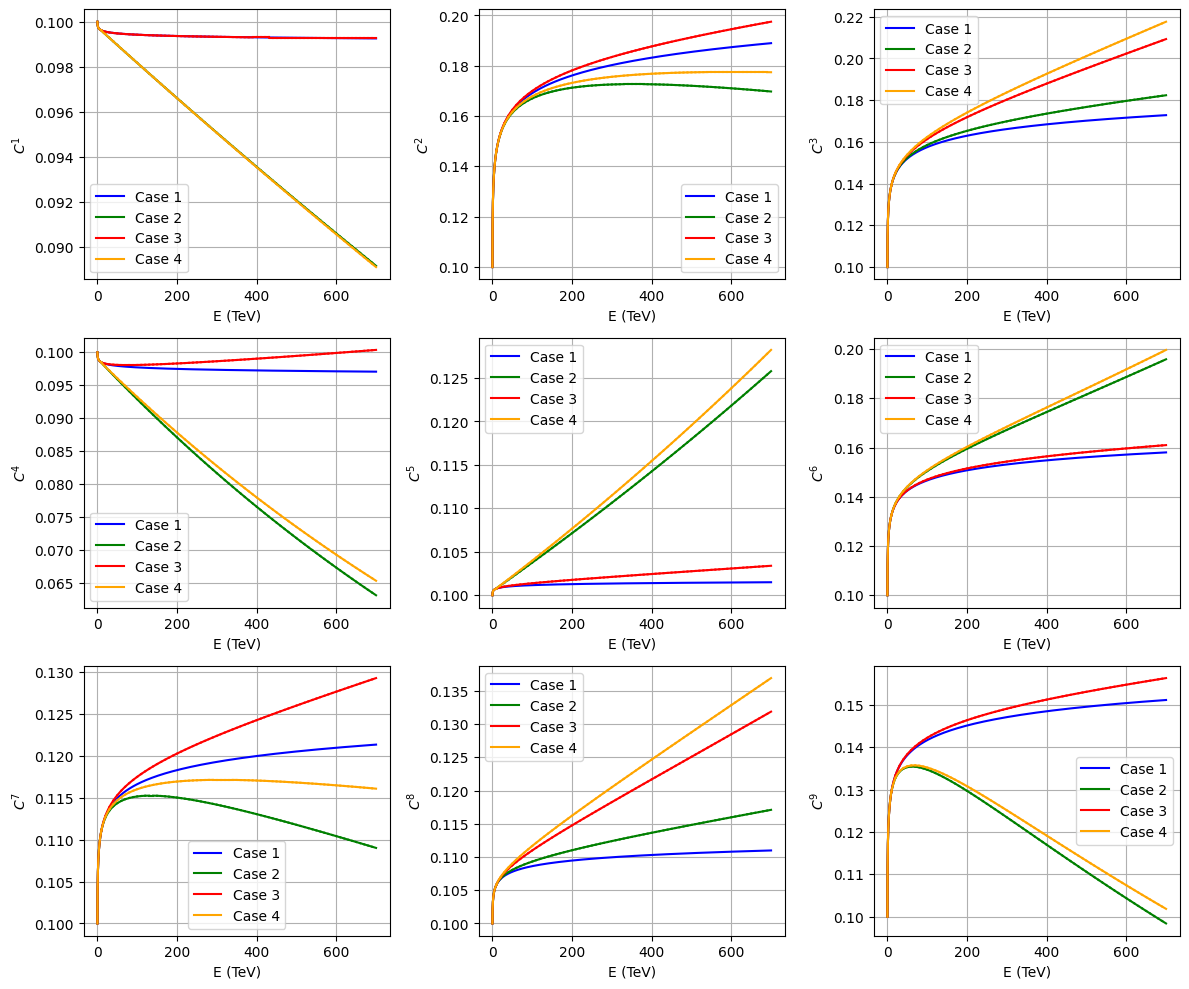

In [17]:
list_of_energy_solutions = [
    energy_solutions_1,
    energy_solutions_2,
    energy_solutions_3,
    energy_solutions_4,
]

list_of_wc = [
    wilson_coefficients_1,
    wilson_coefficients_2,
    wilson_coefficients_3,
    wilson_coefficients_4,
]

labels=["Case 1", "Case 2", "Case 3", "Case 4"]

colors = ["blue", "green", "red", "orange", "black", "gray"]
line_styles = ["solid", "solid", "solid", "solid"]
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.flatten()

# Iterate over all datasets
for idx, (energy_solutions, wilson_coefficients) in enumerate(zip(list_of_energy_solutions, list_of_wc)):

    for i in range(9):
        flag = True
        for e, wc in zip(energy_solutions, wilson_coefficients):
            if flag:
                label = labels[idx] if labels else None
                flag = False
            else:
                label = None
            axs[i].plot(e, wc[i], label=label, color=colors[idx], linestyle=line_styles[idx % len(line_styles)])

for i in range(9):
    axs[i].set_xlabel("E (TeV)")
    axs[i].set_ylabel(f"$C^{(i+1)}$")
    axs[i].grid(True)
    #axs[i].set_yscale('log')
    if labels:
        axs[i].legend()

plt.tight_layout()
plt.savefig("results/wilson_coefficients.pdf")
plt.show()


Finding $\Lambda^{(n)}$ using Wilson Coefficient

In [18]:
alpha = -0.01257 * 1e27 # eV^3
beta = 0.01269 * 1e27 # eV^3

A = [alpha**2, -alpha*beta, alpha*beta, beta**2, beta**2, beta**2, alpha**2, alpha*beta, beta**2]

delta_m = 1e-34*1e9 # eV

def Lambda(wilson_coefficients):
    output = []
    for i, wc in enumerate(wilson_coefficients):
        output.append(np.array([np.abs(wc[j]*A[j]/delta_m)**(1/5) for j in range(len(wc))]))

    return output

In [19]:
Lambda1 = Lambda(wilson_coefficients_1)
Lambda2 = Lambda(wilson_coefficients_2)
Lambda3 = Lambda(wilson_coefficients_3)
Lambda4 = Lambda(wilson_coefficients_4)

Case 1
C1: with RGE = 690.3791298792561 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 786.7685898143808 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 772.8235047137874 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 689.9201374971342 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 696.1095029464626 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 760.5717335501182 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 718.7186157321362 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 707.3237289948086 TeV, without RGE = 692.7226371290008 TeV
C9: with RGE = 753.8101877490284 TeV, without RGE = 694.0402360727206 TeV


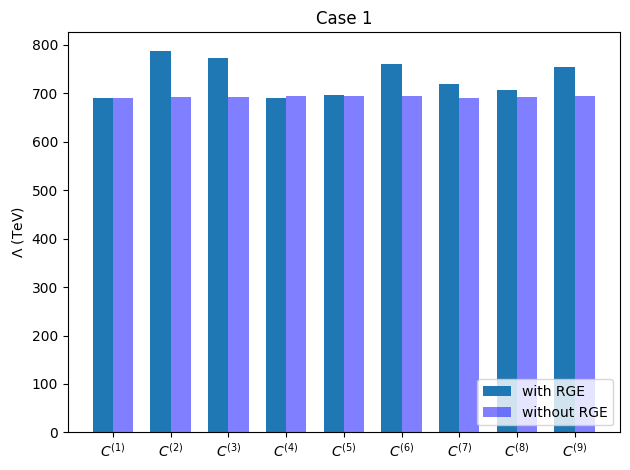

Case 2
C1: with RGE = 675.7250937122116 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 770.0830537542915 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 781.1744616553464 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 633.1817564367896 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 726.6290835533406 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 793.9328642986598 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 703.4630428007188 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 714.9522404987042 TeV, without RGE = 692.7226371290008 TeV
C9: with RGE = 691.8300082390206 TeV, without RGE = 694.0402360727206 TeV


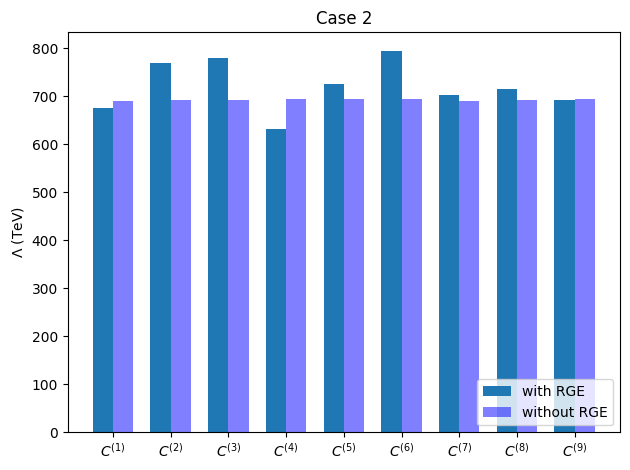

Case 3
C1: with RGE = 690.3779054381689 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 793.7435491967857 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 802.9936873980704 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 694.5428788992994 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 698.6887805016065 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 763.4045998328761 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 727.8963801526809 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 732.1592639568281 TeV, without RGE = 692.7226371290008 TeV
C9: with RGE = 758.8981514980369 TeV, without RGE = 694.0402360727206 TeV


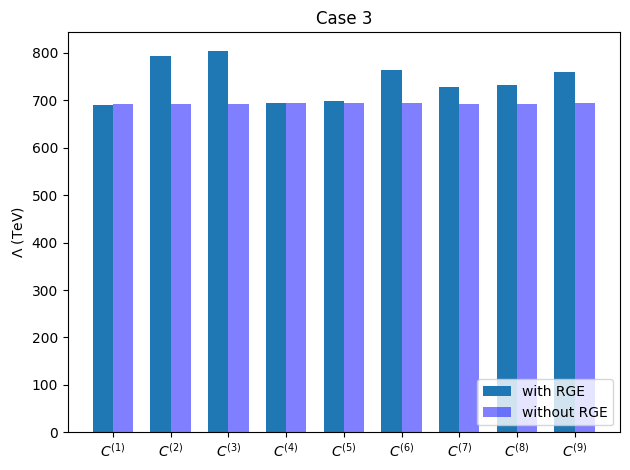

Case 4
C1: with RGE = 675.6414601960768 TeV, without RGE = 691.4075395776874 TeV
C2: with RGE = 776.9107036207666 TeV, without RGE = 692.7226371290008 TeV
C3: with RGE = 809.2769778871918 TeV, without RGE = 692.7226371290008 TeV
C4: with RGE = 637.5214513162149 TeV, without RGE = 694.0402360727206 TeV
C5: with RGE = 729.4337983427414 TeV, without RGE = 694.0402360727206 TeV
C6: with RGE = 796.9973648763109 TeV, without RGE = 694.0402360727206 TeV
C7: with RGE = 712.3717395431183 TeV, without RGE = 691.4075395776874 TeV
C8: with RGE = 737.6843698187269 TeV, without RGE = 692.7226371290008 TeV
C9: with RGE = 696.6013919718896 TeV, without RGE = 694.0402360727206 TeV


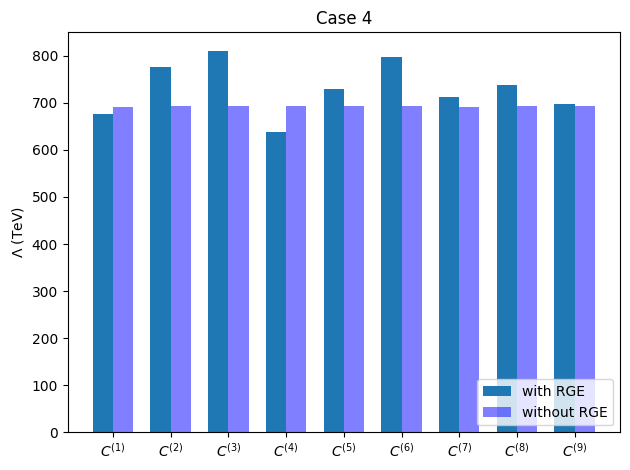

In [21]:
plot_Lambda_bar_graph(Lambda1, title="Case 1", save_path="results/Lambda_case1.pdf")
plot_Lambda_bar_graph(Lambda2, title="Case 2", save_path="results/Lambda_case2.pdf")
plot_Lambda_bar_graph(Lambda3, title="Case 3", save_path="results/Lambda_case3.pdf")
plot_Lambda_bar_graph(Lambda4, title="Case 4", save_path="results/Lambda_case4.pdf")

Correlation Matrix

In [22]:
def find_index(energy, energy_solutions):
    for i, region in enumerate(energy_solutions):
        for j, e in enumerate(region):
            if np.isclose(e, energy):
                return i, j
    return None, None

def find_state(energy, energy_solutions, y_solutions):
    i, j = find_index(energy, energy_solutions)
    if i is not None and j is not None:
        yu = y_solutions[i]['yu'][:,j]
        yd = y_solutions[i]['yd'][:,j]
        g1 = y_solutions[i]['g1'][:,j]
        g2 = y_solutions[i]['g2'][:,j]
        g3 = y_solutions[i]['g3'][:,j]
        wc = y_solutions[i]['wc'][:,j]
        return {
            'yu': yu,
            'yd': yd,
            'g1': g1,
            'g2': g2,
            'g3': g3,
            'wc': wc
        }
    else:
        return None
        
def rho_fn(energy, energy_solutions, y_solutions):
    state = find_state(energy, energy_solutions, y_solutions)
    if state is None:
        return None
    N = len(state['yu'])
    J = len(state['g1'])
    K = len(state['g2'])
    L = len(state['g3'])
    O = len(state['wc'])
    Gamma_matrix = gamma_matrix_fn(np.log(energy * 1e12), state['yu'], state['yd'], state['g1'], state['g2'], state['g3'], [N, J, K, L])
    rho_matrix = np.zeros_like(Gamma_matrix)
    for i in range(O):
        for j in range(O):
            rho_matrix[i][j] = Gamma_matrix[i][j]/np.sqrt(np.abs(Gamma_matrix[i][i] * Gamma_matrix[j][j]))
    return rho_matrix


In [23]:
energy_start = E_transitions[0] * 1e-12  # in TeV
energy_end = E_END * 1e-12  # in TeV

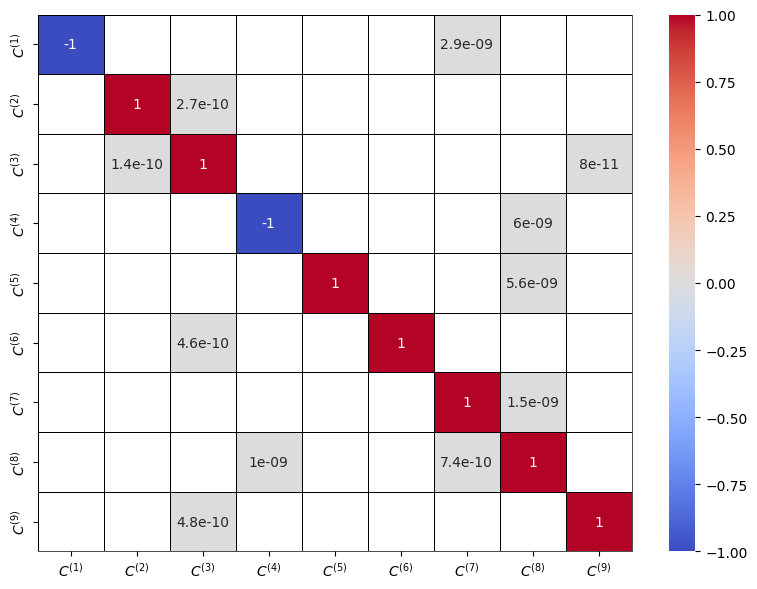

In [24]:
rho_start = rho_fn(energy_start, energy_solutions_1, y_solutions_1)

plot_correlation_matrix(rho_start, save_path="results/rho_matrix_90GeV.pdf")

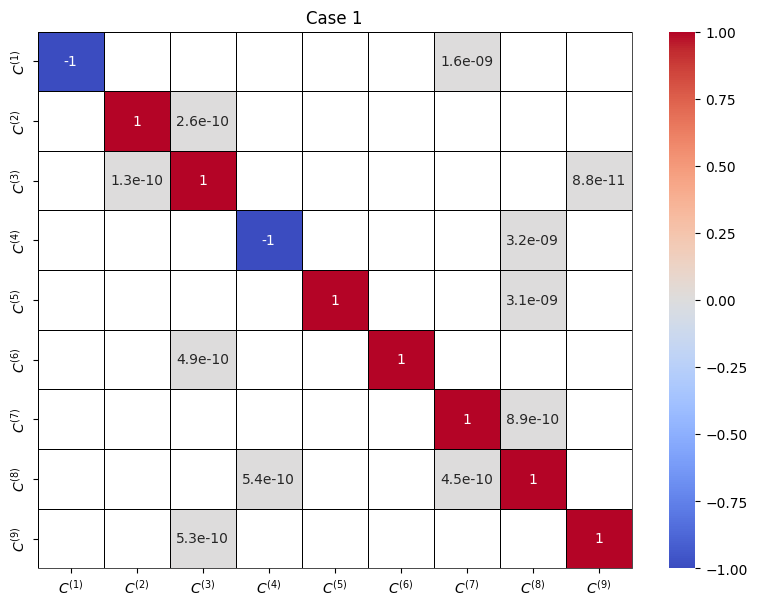

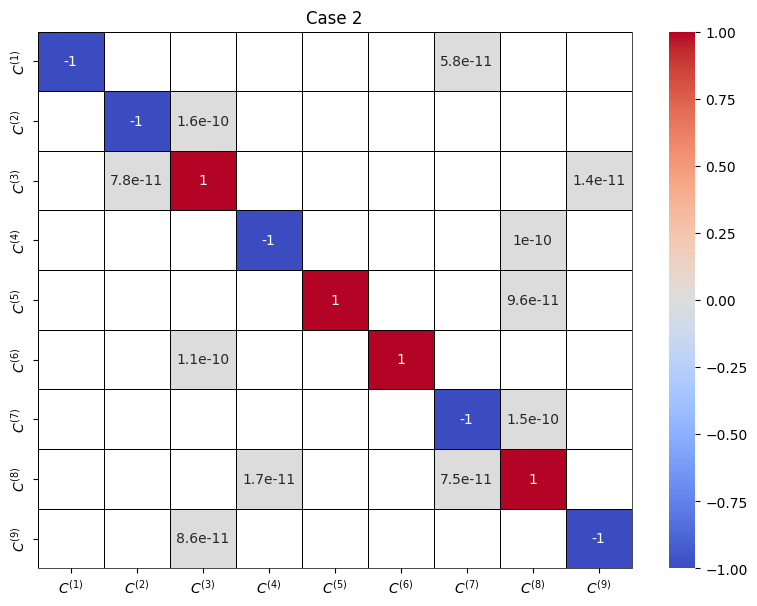

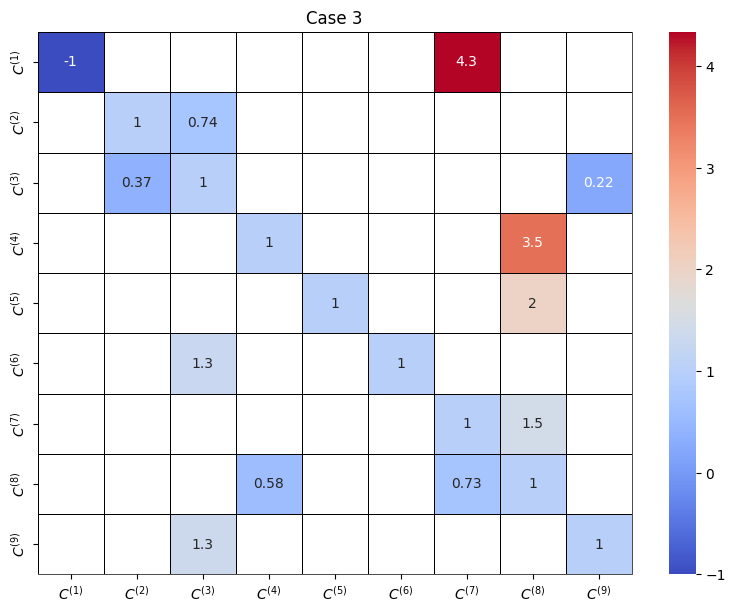

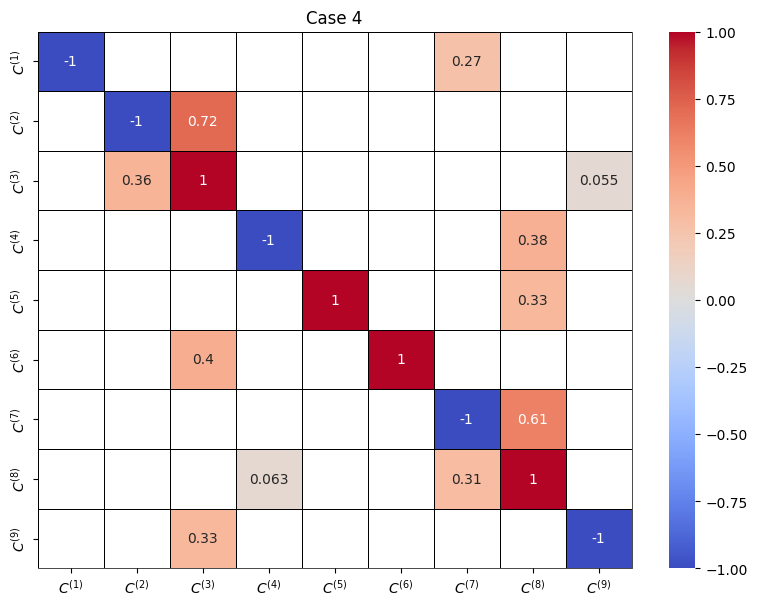

In [25]:
rho_end_1 = rho_fn(energy_end, energy_solutions_1, y_solutions_1)
plot_correlation_matrix(rho_end_1, title="Case 1", save_path="results/rho_matrix_700TeV_1.pdf")

rho_end_2 = rho_fn(energy_end, energy_solutions_2, y_solutions_2)
plot_correlation_matrix(rho_end_2, title="Case 2", save_path="results/rho_matrix_700TeV_2.pdf")

rho_end_3 = rho_fn(energy_end, energy_solutions_3, y_solutions_3)
plot_correlation_matrix(rho_end_3, title="Case 3", save_path="results/rho_matrix_700TeV_3.pdf")

rho_end_4 = rho_fn(energy_end, energy_solutions_4, y_solutions_4)
plot_correlation_matrix(rho_end_4, title="Case 4", save_path="results/rho_matrix_700TeV_4.pdf")